In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import sys
import warnings

from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from sklearn import metrics, model_selection
from sklearn import tree
from tqdm import tqdm

# package imports
sys.path.append("src")
from credit import preprocess, models


# settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("error")

In [2]:
importlib.reload(preprocess)
importlib.reload(models)

data_original = preprocess.load_credit()
data = preprocess.group_credit_variables(data_original.copy())

display(data.head())

possible_variables = models.get_possible_variables(data)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,2,3,1169,1,1,2,1,0,1,real estate,67,1,1,0,0,1,yes,0,1
1,0,48,1,3,5951,2,0,0,0,0,2,real estate,22,1,1,1,1,1,none,0,1
2,2,12,2,0,2096,2,2,0,1,0,0,real estate,49,1,1,1,0,2,none,0,2
3,1,42,1,1,7882,2,2,0,1,0,1,building society savings,45,1,0,1,0,2,none,0,1
4,1,24,0,2,4870,2,0,1,1,0,1,unknown/none,53,1,0,0,1,2,none,0,1


100%|████████████████████████████████████████████████████████████████████████████████| 987/987 [00:10<00:00, 98.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 403/403 [00:09<00:00, 40.62it/s]


,nvars,yvar,xvars,Coefficients,p-values,KS Score (train),ROC AUC Score (train),F1 Score (train),KS Score (test),ROC AUC Score (test),F1 Score (test)
70,3.0,default,"['checking_balance', 'months_loan_duration', '...","[-1.3895101280024325, 0.6442951367735648, -1.1...","[1.0614461701695586e-09, 0.0009468536266089917...",0.405132,0.744164,0.404313,0.448732,0.807128,0.505495
71,3.0,default,"['checking_balance', 'months_loan_duration', '...","[-0.5225301517943151, 0.6095583036476959, -1.2...","[0.11651610704439874, 0.0017238081445456778, 9...",0.405058,0.742560,0.412698,0.401851,0.758745,0.489362
72,3.0,default,"['checking_balance', 'months_loan_duration', '...","[-1.0087927185912358, 0.5643641027123795, -1.2...","[3.2102817061621756e-05, 0.0037308129281367194...",0.402349,0.741829,0.423592,0.435749,0.781705,0.466667
74,3.0,default,"['checking_balance', 'property', 'age']","[0.4040253550985433, 0.5787512818563902, -1.23...","[0.2304791455688192, 0.0029704654556954686, 6....",0.391689,0.741685,0.403183,0.387186,0.718476,0.269663
73,3.0,default,"['checking_balance', 'amount', 'age']","[-0.11629170166710719, 0.6597705430389144, -1....","[0.7043836521205458, 0.0006957780459189211, 1....",0.380288,0.738515,0.403183,0.382137,0.723885,0.367816


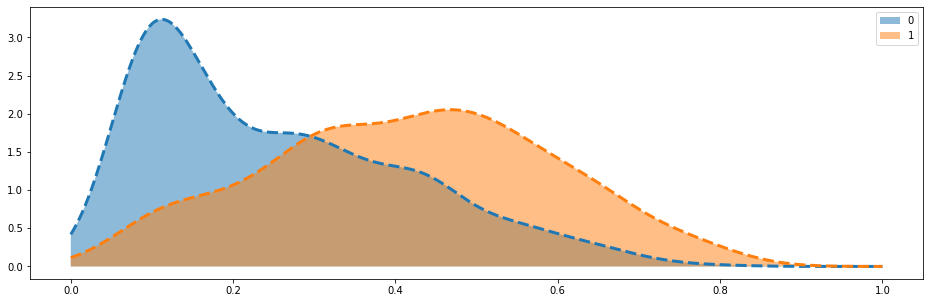

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  800
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            6
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.1304
Time:                        20:39:36   Log-Likelihood:                -425.70
converged:                       True   LL-Null:                       -489.54
Covariance Type:            nonrobust   LLR p-value:                 3.956e-25
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3895      0.228     -6.100      0.000      -1.836      -0.943
checking_balance_1       0.6443      0.195      3.306      0.001       0.262       1.026
checking_balance_2      -1.1886      0.215     -5.540      0.000      -1.609      -0.768
months_loan_duration     0.0397      0.007      5.664      0.000       0.026       0.053
employment_length_1     -0.4501      0.222     -2.028      0.043      -0.885      -0.015
employment_length_2     -0.4886      0.247     -1.976      0.048      -0.973      -0.004
employment_length_3      0.2575      0.230      1.120      0.263      -0.193       0.708
========================================================================================
"""

In [5]:
importlib.reload(models)

yvar = "default"


df_res, model = models.explore_logit_models(data, possible_variables, oversample=False)
display(df_res.head())

df = models.get_modelling_data(data, eval(df_res["xvars"].values[0]), yvar)
X = df[[col for col in df.columns if col != yvar]].copy()
X.insert(0, "const", 1)

models.plot_probabilities(df[yvar], model.predict(X), how="kde")


display(model.summary())

100%|████████████████████████████████████████████████████████████████████████████████| 403/403 [00:11<00:00, 35.82it/s]


,nvars,yvar,xvars,Coefficients,p-values,KS Score (train),ROC AUC Score (train),F1 Score (train),KS Score (test),ROC AUC Score (test),F1 Score (test)
69,3.0,default,"['checking_balance', 'months_loan_duration', '...","[-0.5627751286715288, 0.5504174793948304, -1.2...","[0.03273876755356818, 0.0005393108558013236, 7...",0.401777,0.742501,0.410526,0.408943,0.764034,0.489362
70,3.0,default,"['checking_balance', 'months_loan_duration', '...","[-1.130563792320812, 0.5364769935491841, -1.27...","[6.455892306575888e-09, 0.000705916731419363, ...",0.395267,0.741035,0.411924,0.435749,0.789999,0.466667
73,3.0,default,"['checking_balance', 'property', 'age']","[0.4855546435677317, 0.5070178622039716, -1.30...","[0.0655526669613454, 0.0014244355771371548, 3....",0.393404,0.740853,0.406332,0.392715,0.721601,0.319149
71,3.0,default,"['checking_balance', 'credit_history', 'age']","[1.0431780397396935, 0.5588204860946305, -1.26...","[0.00020751169313022006, 0.0004434264087320163...",0.376784,0.736919,0.398977,0.405818,0.746424,0.355556
72,3.0,default,"['checking_balance', 'amount', 'age']","[-0.15826774563723933, 0.6195404615412732, -1....","[0.5128648818846877, 9.942248954754458e-05, 9....",0.371662,0.737595,0.367568,0.389229,0.727251,0.395349


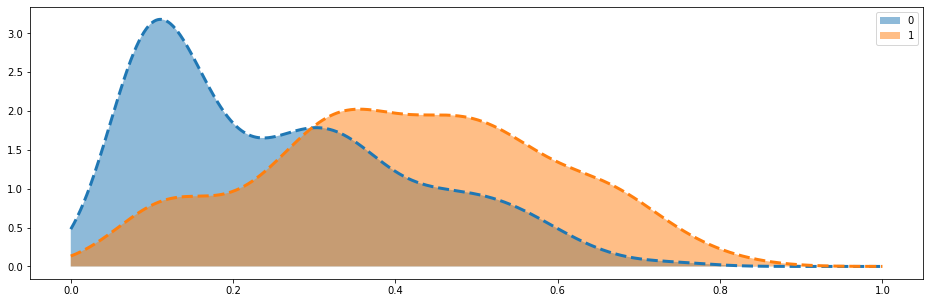

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            4
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                 0.03529
Time:                        20:39:47   Log-Likelihood:                -747.59
converged:                       True   LL-Null:                       -774.94
Covariance Type:            nonrobust   LLR p-value:                 3.772e-11
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5628      0.264     -2.135      0.033      -1.079      -0.046
checking_balance_1       0.5504      0.159      3.460      0.001       0.239       0.862
checking_balance_2      -1.2944      0.161     -8.061      0.000      -1.609      -0.980
months_loan_duration     0.0378      0.006      6.752      0.000       0.027       0.049
age                     -0.0248      0.006     -4.086      0.000      -0.037      -0.013
========================================================================================
"""

In [6]:
importlib.reload(models)

yvar = "default"


df_res, model = models.explore_logit_models(data, possible_variables, oversample=True)
display(df_res.head())

df = models.get_modelling_data(data, eval(df_res["xvars"].values[0]), yvar)
X = df[[col for col in df.columns if col != yvar]].copy()
X.insert(0, "const", 1)

models.plot_probabilities(df[yvar], model.predict(X), how="kde")


display(model.summary())